<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/Principle_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
info = load_digits()
data = info.data
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
# # KMeans written from scratch


# import numpy as np
# import time 
# data.shape
# k = 5
# n, d = data.shape
# centroids = data[np.random.choice(n, k, replace=False)]

# max_iter = 100
# t1 = time.time()
# for _ in range(max_iter):
#   distances = np.zeros((n, k))
#   for i in range(n):
#     for j in range(k):
#       distances[i][j] = np.linalg.norm(data[i,:] - centroids[j])
#       labels = np.argmin(distances, axis = 1 )
#   for j in range(k):
#     centroids[j] = np.mean(data[labels == j], axis = 0) # axis=0 is needed to find the mean along the columns of x
# t2 = time.time()
# print(t2-t1)
# print(accuracy_score(info.target,labels))
# centroids

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import time

t1 = time.time()
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
t2 = time.time()

print(t2-t1)
# print(accuracy_score(info.target,labels))
# print("Cluster labels:", labels)
# print("Cluster centroids:", centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2.0666344165802


#PCA from Scratch

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

mean = np.mean(data, axis=0)
data_centered = data - mean

# Finding the sample covariance matrix
D = data_centered.T
D.shape
covariance_matrix = (D@D.T)/(len(D[0]))

# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvectors based on their corresponding eigenvalues
eigenvalue_indices = np.argsort(eigenvalues)[::-1] # Reverses the array having arguments of elements in increasing order
sorted_eigenvalues = eigenvalues[eigenvalue_indices] # Sort the eigenvalues
sorted_eigenvectors = eigenvectors[:, eigenvalue_indices] # Take all the columns of the eigenvectors
n_dim = 2

# Transform the data into the new space
W = sorted_eigenvectors[:,eigenvalue_indices[:n_dim]] # Take all columns of the 
mat = np.dot(data_centered, W)
mat

array([[  1.25946645, -21.27488348],
       [ -7.9576113 ,  20.76869896],
       [ -6.99192297,   9.95598641],
       ...,
       [-10.8012837 ,   6.96025223],
       [  4.87210009, -12.42395362],
       [  0.34438963,  -6.36554919]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import time

t1 = time.time()
X = np.random.rand(100, 2)
kmeans = KMeans(n_clusters=10)
kmeans.fit(mat)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
t2 = time.time()

print(t2-t1)
# print(accuracy_score(info.target,labels))
# print("Cluster labels:", labels)
# print("Cluster centroids:", centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2903299331665039


#Time difference

4 dimesions - 0.03s

2 dimesions - 0.015s

#Visulaising the clustering in a 2D plane.
Elements belonging to the same cluster are close enough, hence, PCA is a good algorithm for dimensionality reduction.

<ipython-input-35-2ac2d6c8b2fb>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


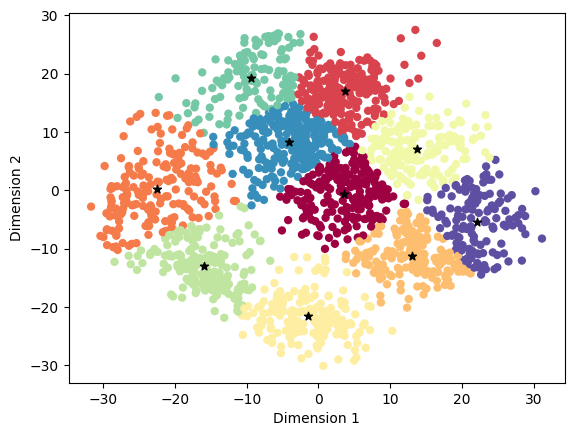

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(mat[:, 0], mat[:, 1],
            c=labels, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
n_dim = 3

# Transform the data into the new space
W = sorted_eigenvectors[:,eigenvalue_indices[:n_dim]] # Take all columns of the 
mat = np.dot(data_centered, W)
mat

array([[  1.25946645, -21.27488348,   9.46305462],
       [ -7.9576113 ,  20.76869896,  -4.43950604],
       [ -6.99192297,   9.95598641,  -2.95855808],
       ...,
       [-10.8012837 ,   6.96025223,  -5.59955453],
       [  4.87210009, -12.42395362,  10.17086635],
       [  0.34438963,  -6.36554919, -10.77370849]])

#Visulaising the clustering in a 3D plane.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import time

t1 = time.time()
X = np.random.rand(100, 2)
kmeans = KMeans(n_clusters=10)
kmeans.fit(mat)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
t2 = time.time()

print(t2-t1)

0.14934897422790527


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-38-e44c51fc491f>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


Text(0.5, 0, 'Dimension 3')

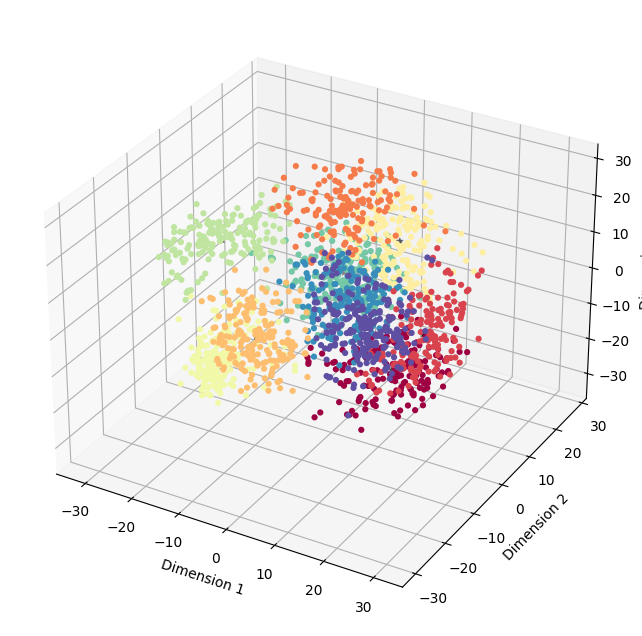

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(mat[:, 0], mat[:, 1], mat[:,2],
            c=labels, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker='*',color='black')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')